In [2]:
pwd

'/Users/amischel/Desktop/weak-lensing-mock-generation'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import Lensing as l
from astropy.cosmology import Planck18
from astropy.cosmology import WMAP9

In [4]:
data = np.load("/Users/amischel/Downloads/BAHAMAS_cutouts/CDMb/GrNm_001.npz")

In [5]:
data.files

['R200',
 'CoP',
 'gas_pos',
 'bh_pos',
 'Mfof',
 'star_pos',
 'gas_mass',
 'dm_mass',
 'bh_mass',
 'M200',
 'star_mass',
 'dm_pos']

In [45]:
data['R200']

array(2.10804844)

In [46]:
h = 0.700

dm_mass = (data['dm_mass'])*u.solMass
bh_mass = data['bh_mass']*u.solMass
gas_mass = data['gas_mass']*u.solMass
star_mass = data['star_mass']*u.solMass 

CoP = (data['CoP']*h)*u.Mpc

dm_pos = (data['dm_pos']*h)*u.Mpc
bh_pos = (data['bh_pos']*h)*u.Mpc
gas_pos = (data['gas_pos']*h)*u.Mpc
star_pos = (data['star_pos']*h)*u.Mpc

In [7]:
bh_pos

<Quantity [[177.76978302, 265.01218567,   5.11477094],
           [178.3969696 , 265.1318573 ,   5.02841349],
           [179.3885437 , 265.74837341,   7.54550114],
           ...,
           [184.08147888, 267.90254822,   5.71379967],
           [184.07857361, 267.8742218 ,   5.72562437],
           [184.07718506, 267.98252869,   5.76327877]] Mpc>

In [8]:
dm_pos

<Quantity [[177.88742523, 266.45881958,   1.45163586],
           [178.16924744, 266.82855835,   1.33620248],
           [178.16571198, 266.04962463,   1.59887371],
           ...,
           [184.28760376, 268.03268738,   5.81528196],
           [184.30219421, 268.04170227,   5.86449003],
           [184.27967834, 268.07705688,   5.8598424 ]] Mpc>

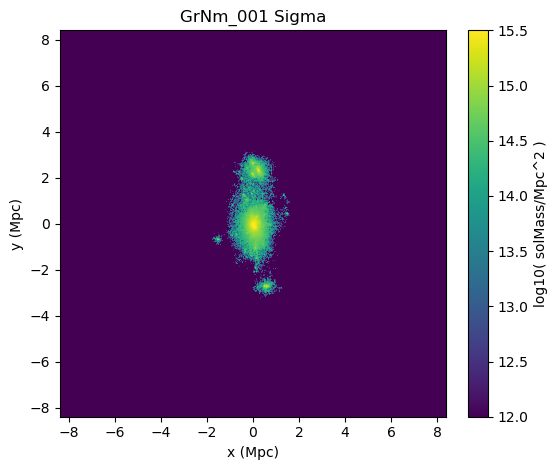

In [39]:
# bins = 1200
bins = 2000
hfov = 12*h # "half the fielf of view"

STARS_weighted, xedges_stars, yedges_stars = np.histogram2d(star_pos[:,0]-CoP[0], star_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=star_mass[:])
GAS_weighted, xedges_gas, yedges_gas = np.histogram2d(gas_pos[:,0]-CoP[0], gas_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=gas_mass[:])
BH_weighted, xedges_bh, yedges_bh = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=bh_mass[:])
DM_weighted, xedges_dm, yedges_dm = np.histogram2d(dm_pos[:,0]-CoP[0], dm_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=dm_mass[:])

bin_area = (xedges_stars[1] - xedges_stars[0])**2

Sigma = (STARS_weighted + GAS_weighted + BH_weighted + DM_weighted)/bin_area

# plt.hist(np.log10(Sigma.flatten()+1e-9), bins=bins)
# plt.xlabel('mass of star particle / $10^9 M_\odot$')
# plt.ylabel('number of particles')

sigma_plot = plt.imshow(np.log10((Sigma+(1e-5)*u.solMass/u.Mpc**2).to_value(u.solMass/u.Mpc**2)).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov], vmin=12, vmax=15.5)
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.colorbar(sigma_plot,fraction=0.046, pad=0.04, label='log10( solMass/Mpc^2 )') 
plt.title('GrNm_001 Sigma')
plt.tight_layout()

In [40]:
zlens = 0.3
zsource = 1.0

dL = Planck18.angular_diameter_distance(zlens) # distance from the viewer to the lens plane
dS = Planck18.angular_diameter_distance(zsource) # distance from the viewer to the source plane
dLS = Planck18.angular_diameter_distance_z1z2(zlens, zsource) # distance from the lens plane to the source

sigma_crit = (const.c**2/(4*np.pi*const.G) * dS/(dL*dLS)).decompose()

convergence = (Sigma/sigma_crit).to_value('')

In [41]:
convergence

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
x0 = np.linspace(-hfov, hfov, bins)*u.Mpc
y0 = np.linspace(-hfov, hfov, bins)*u.Mpc
x,y = np.meshgrid(x0,y0, indexing = 'ij')

[[-0.00092981 -0.00092935 -0.00092893 ... -0.00093144 -0.00093085
  -0.00093031]
 [-0.00093023 -0.00092977 -0.00092935 ... -0.00093186 -0.00093128
  -0.00093073]
 [-0.00093061 -0.00093014 -0.00092972 ... -0.00093225 -0.00093166
  -0.00093111]
 ...
 [-0.0009283  -0.00092785 -0.00092744 ... -0.00092991 -0.00092933
  -0.0009288 ]
 [-0.00092885 -0.00092839 -0.00092798 ... -0.00093046 -0.00092988
  -0.00092934]
 [-0.00092935 -0.00092889 -0.00092847 ... -0.00093097 -0.00093039
  -0.00092985]]


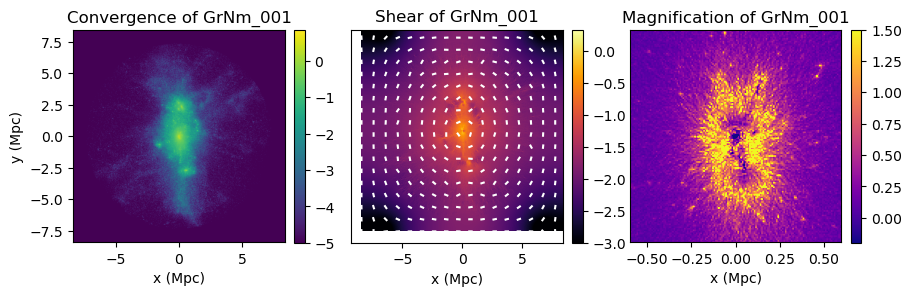

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,9))

convergence_plot = ax1.imshow((np.log10(convergence + 1e-5)).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
ax1.set_xlabel('x (Mpc)')
ax1.set_ylabel('y (Mpc)')
plt.colorbar(convergence_plot,fraction=0.046, pad=0.04, label='') 
ax1.set_title('Convergence of GrNm_001')
#print(sigma_crit)

shear1, shear2, shear = l.calculate_shear(convergence, len(convergence), len(convergence), len(convergence[0]))
shear_plot = ax2.imshow((np.log10(shear + 1e-5)).T, origin = 'lower', vmin = -3, extent=[-hfov,hfov,-hfov,hfov])
ax2.set_title('Shear of GrNm_001')
ax2.set_xlabel('x (Mpc)')
ax2.set(yticklabels=[])
ax2.set(ylabel=None)  # remove the y-axis label
ax2.tick_params(left=False)
l.draw_shearlines(center_x=x, center_y=y, shear1=shear1, shear2=shear2, length=0.2*u.Mpc, a=120, ax=ax2)
print(shear1)


plt.colorbar(shear_plot,fraction=0.046, pad=0.04, label='')
shear_plot.set_cmap('inferno')

magnification = 1/((1-convergence)**2 - shear**2)
magnification_plot = ax3.imshow((np.log10(np.abs(magnification) + 1e-5)).T, vmin = -0.2, vmax = 1.5, origin = 'lower', extent=[-hfov,hfov,-hfov,hfov])
ax3.set_title('Magnification of GrNm_001')
ax3.set_xlabel('x (Mpc)')
ax3.set(yticklabels=[])
ax3.set(ylabel=None)  # remove the y-axis label
ax3.tick_params(left=False)
ax3.set_xlim(-0.6,0.6)
ax3.set_ylim(-0.6,0.6)
plt.colorbar(magnification_plot,fraction=0.046, pad=0.04, label='')
magnification_plot.set_cmap('plasma')

plt.tight_layout()
plt.show()

In [44]:
pwd


'/Users/amischel/Desktop/weak-lensing-mock-generation'

In [38]:
np.savez('BAHAMAS_GrNm_XXX.npz', kappa=convergence, gamma1=shear1, gamma2=shear2, mu=magnification)

In [31]:
data = np.load('test.npz')

FileNotFoundError: [Errno 2] No such file or directory: 'test.npz'

In [16]:
data.files

['kappa', 'gamma1', 'gamma2', 'mu']

In [17]:
data['gamma1']

array([[-0.01077119, -0.0132519 , -0.03122704, ..., -0.01313339,
        -0.01257965, -0.01216226],
       [-0.01332351, -0.01593665, -0.01671891, ..., -0.01339375,
        -0.01306788, -0.01303127],
       [-0.0140168 , -0.01444198, -0.01527042, ..., -0.0135477 ,
        -0.01350158, -0.01351716],
       ...,
       [-0.01370417, -0.01583333, -0.01701065, ..., -0.01210798,
        -0.01279907, -0.01318052],
       [-0.01071467, -0.01337104, -0.03089969, ..., -0.01276621,
        -0.01227578, -0.01233417],
       [-0.00959723,  0.00466012, -0.01324904, ..., -0.01279677,
        -0.01258318, -0.01102663]])

Organize code structure so that given a BAHAMAS cluster, a lens redshift, a source redshift, and a location on the lens plane, the shear at that location is determined. Could also potentially include an angle for the projection direction of the BAHAMAS cluster. Will also need to consider (ith the lens redshift) the angular scale of the image. Will also need to look into blurring techniques (perhaps simple gaussian blurring or PYSPHviewer). Also, for the shear map, change the lengths of each line so they are constant to avoid really long lines. Probably store the extent (in Mpc beacuse that won't change based on how far away it is) in each data file. Have abritrary chosen redshifts for lens and source in the data file to generate a deafult convergence and shear, and in the function that actually calculates the shear at a point, some of the inputs will be the actually chosen lens and source redshifts that I can then scale the previous answers by. 

Consider making a class for a BAHAMAS object and it has methods inside of it like calculate shear at certain point. also contains all the information about the convergence and shear maps, and default redshifts. Instantiating the object would allow me to retrieve that information and access the methods.

github desktop for mac